In [1]:
import pandas as pd
import json

In [2]:
dataset_path = "/app/datasets/oberon/forum.json"

In [3]:
data = []
with open(dataset_path, encoding = 'utf-8-sig') as f:
    for line in f:
        data.append(json.loads(line))


In [4]:
df = pd.read_json(dataset_path, lines=True, encoding = 'utf-8-sig')

In [5]:
df

,SubForumNumber,SubForum,TopicNumber,Topic,MessageNumber,Author,Content
0,1,Общие вопросы,6903,Создание FAQ,0,Иван Денисов,"> -- arisu писал(а):\n> а почему, собственно, ..."
1,1,Общие вопросы,6903,Создание FAQ,1,arisu,> -- Иван Денисов писал(а):\n> И надо сделать ...
2,1,Общие вопросы,6903,Создание FAQ,2,Иван Денисов,У меня появилась идея выделить сюда отдельно о...
3,1,Общие вопросы,6903,Создание FAQ,3,Иван Денисов,Нашел ещё некоторые заготовки вопросов на фору...
4,1,Общие вопросы,6903,Создание FAQ,4,arisu,"о, чудесно, спасибо! может, эту темку сделать ..."
...,...,...,...,...,...,...,...
61846,122,Видео-встречи по Блэкбоксу,4269,Google Hangouts для видеовстреч по ББ,35,Иван Денисов,Оформилстраничку проекта.
61847,122,Видео-встречи по Блэкбоксу,4269,Google Hangouts для видеовстреч по ББ,36,Иван Денисов,Сегодня в 17 по Московскому времени попробуем ...
61848,122,Видео-встречи по Блэкбоксу,4269,Google Hangouts для видеовстреч по ББ,37,Иван Денисов,> -- Иван Денисов писал(а):\n> Сегодня в 17 по...
61849,122,Видео-встречи по Блэкбоксу,4269,Google Hangouts для видеовстреч по ББ,38,Иван Денисов,Следующая встреча состоится в воскресение (31 ...


<Axes: ylabel='SubForum'>

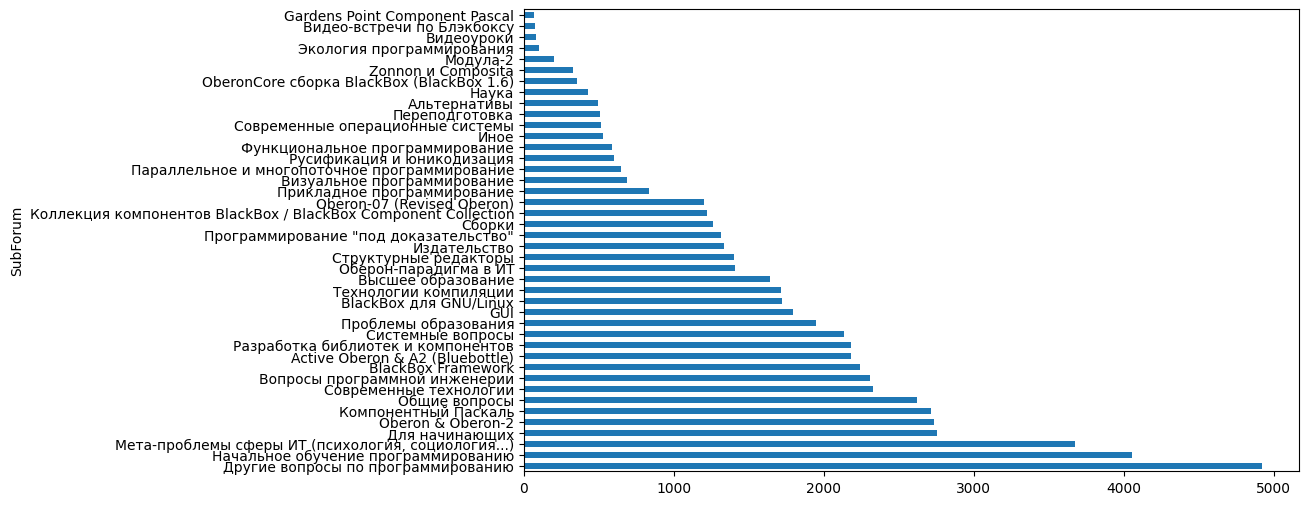

In [6]:
df.value_counts("SubForum", ascending=False).plot(kind='barh', figsize=(10, 6))

<Axes: ylabel='Author'>

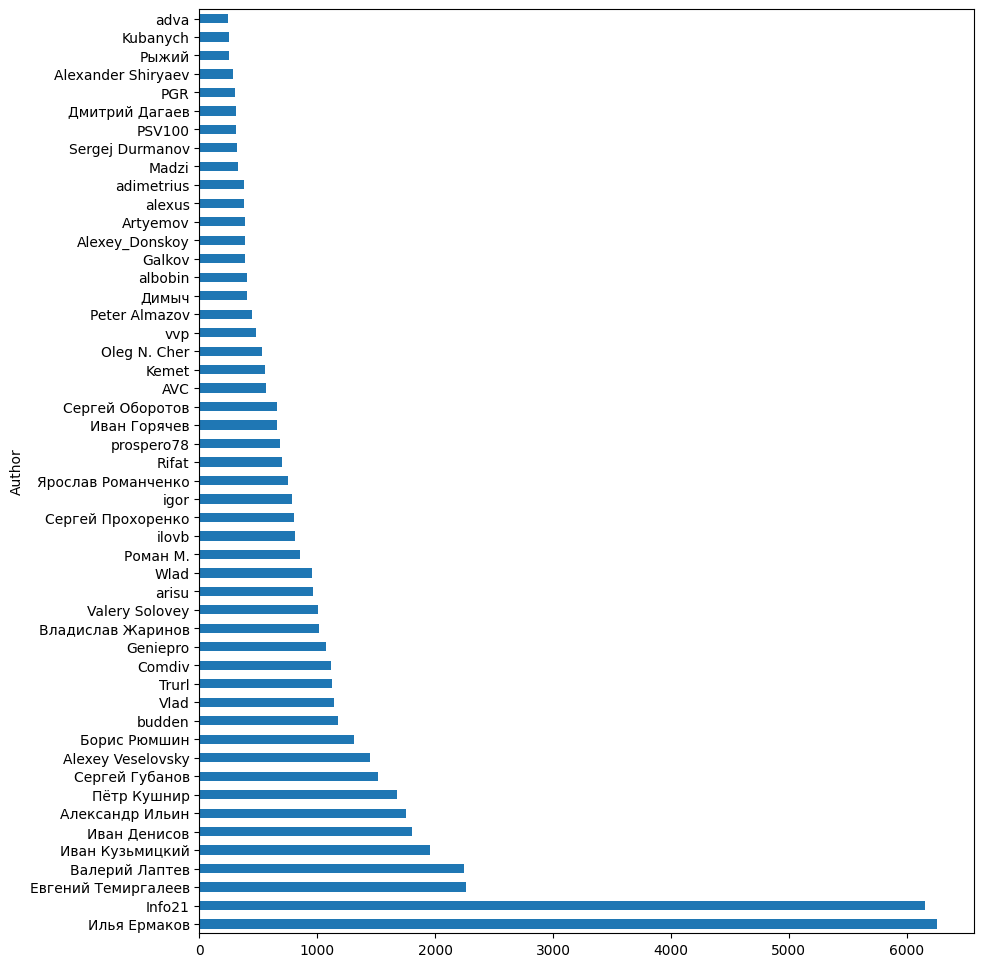

In [7]:
df.value_counts("Author", ascending=False).nlargest(50).plot(kind='barh', figsize=(10, 12))

<Axes: ylabel='SubForum,Topic'>

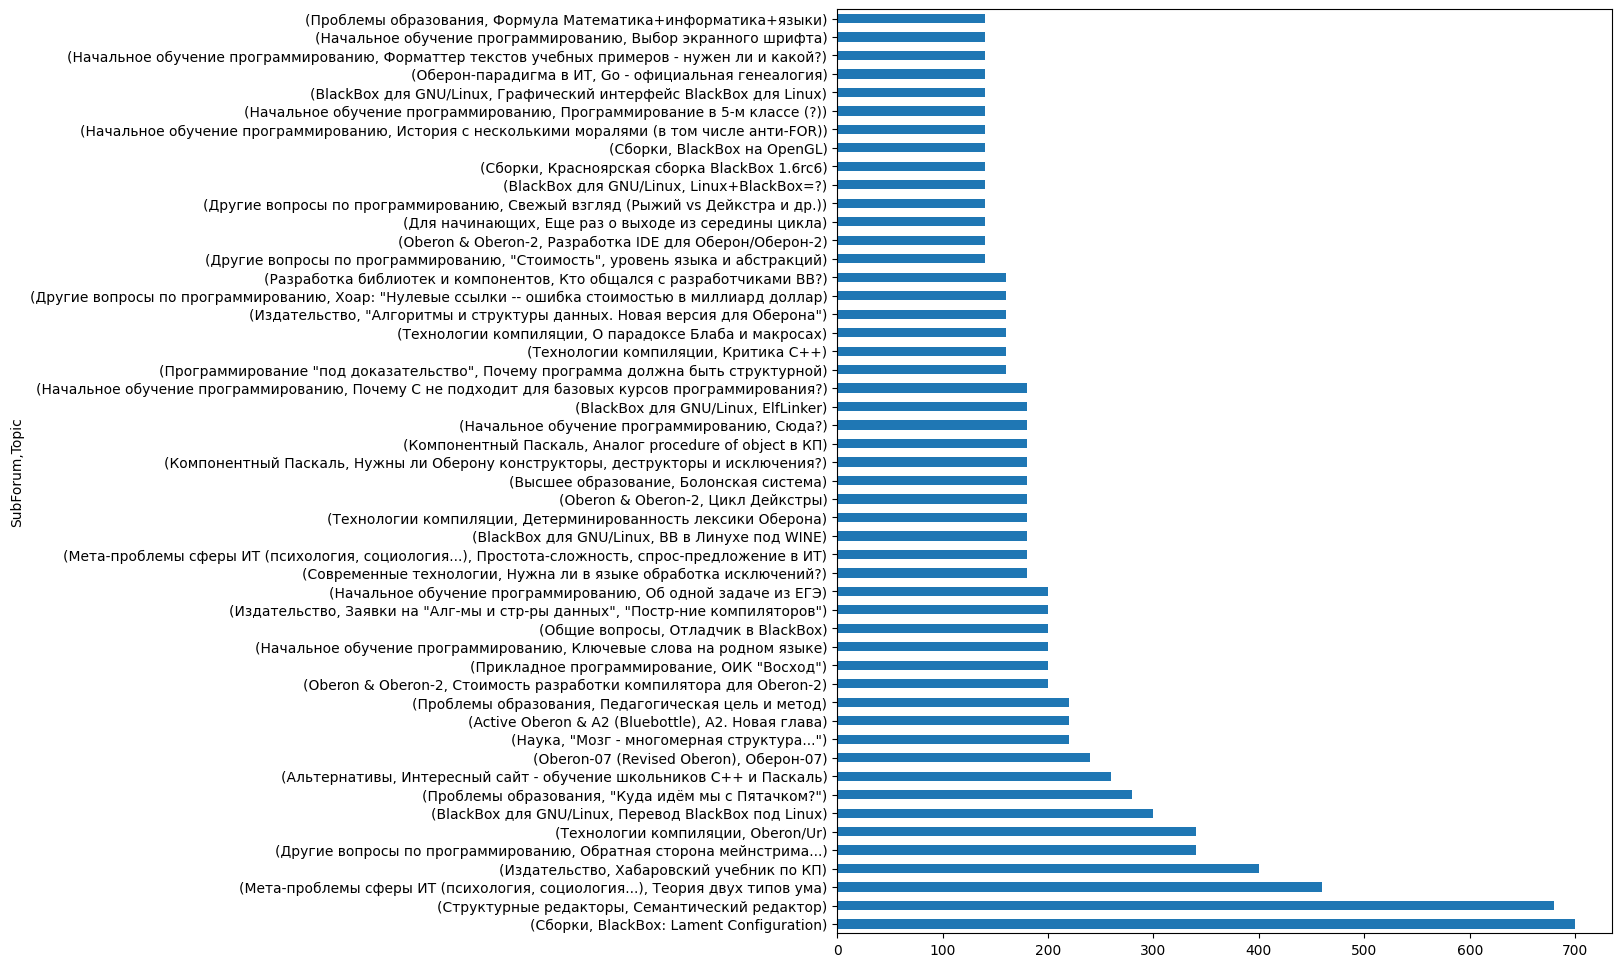

In [8]:
df.value_counts(["SubForum","Topic"], ascending=False).nlargest(50).plot(kind='barh', figsize=(10, 12))

In [9]:
cnt = df.loc[df["Topic"] == 'расширение компилятора циклом Дейкстры'].iloc[0]["Content"]
print(cnt)

и ещё предлагаю: добавить в компилятор и в репорт языка цикл Дейкстры. только немного расширеный вариант:
## Код:
```
LOOP
  <this executes at each iteration>
DO IF cond0 THEN
  …
DO IF cond1 THEN
  …
END
```

синтаксис немного уродливый, но я не хочу вводить новые ключевые слова.
часть, которая исполняется на каждом шаге — опциональна.

или такой вариант синтаксиса:
## Код:
```
LOOP
  <this executes at each iteration>
| IF cond0 DO
  …
| ELSIF cond1 DO
  …
END
```


почему не классика с WHILE? чтобы было удобно реализовывать штуки типа sequence shift без копипасты:
## Код:
```
LOOP
  file.ReadCh(ch)
DO IF ~file.eof THEN
  …
END
```


в конце-концов, есть же, кажется, консенсус, что цикл Дейкстры — хорошо. и омики уже вряд ли будут развивать Component Pascal — так почему бы нам не взять этот флаг и не понести дальше?

синтаксис кривоватый, но зато в таком виде все старые исходники будут компилироваться как и раньше. почему именно IF там? потому что `DO WHILE …` можно прочитать как «исп

In [10]:
from IPython.display import display, Markdown, Latex
display(Markdown(cnt))

и ещё предлагаю: добавить в компилятор и в репорт языка цикл Дейкстры. только немного расширеный вариант:
## Код:
```
LOOP
  <this executes at each iteration>
DO IF cond0 THEN
  …
DO IF cond1 THEN
  …
END
```

синтаксис немного уродливый, но я не хочу вводить новые ключевые слова.
часть, которая исполняется на каждом шаге — опциональна.

или такой вариант синтаксиса:
## Код:
```
LOOP
  <this executes at each iteration>
| IF cond0 DO
  …
| ELSIF cond1 DO
  …
END
```


почему не классика с WHILE? чтобы было удобно реализовывать штуки типа sequence shift без копипасты:
## Код:
```
LOOP
  file.ReadCh(ch)
DO IF ~file.eof THEN
  …
END
```


в конце-концов, есть же, кажется, консенсус, что цикл Дейкстры — хорошо. и омики уже вряд ли будут развивать Component Pascal — так почему бы нам не взять этот флаг и не понести дальше?

синтаксис кривоватый, но зато в таком виде все старые исходники будут компилироваться как и раньше. почему именно IF там? потому что `DO WHILE …` можно прочитать как «исполняй только эту ветку пока страж цикла истина», а с `IF`, мне кажется, более понятно, что ветка исполнится. сеточку `DO IF` удобно выравнивать, и парзеру легче замечать ошибки, поэтому `DO IF … DO IF…`, а не `DO ELSIF` или подобное. хотя `DO ELSIF` тоже можно, конечно. но мне так не очень нравится.

прошу уважаемых коллег высказываться. если у вас есть идеи по более красивому синтаксису — тоже, пожалуйста, не стесняйтесь. я, конечно, буду защищать свой вариант, но меня возможно переубедить хорошими аргументами. ;-)

реализацию финального варианта в компиляторе я беру на себя.

я понимаю и опасность ломания компилятора, и потерю совместимости с другими реализациями — но это конкретное изменение того стоит, мне кажется. если мы утрясём синтаксис и реализуем у себя — остальные подтянутся; изменение несложное, а пользу явную вижу я.

In [11]:
df.loc[df["Author"] == 'Иван Денисов'].iloc[0]["Content"]

'> -- arisu писал(а):\n> а почему, собственно, нет, если он будет в стандартной системе? как по мне — он не так уж сильно отличается от StdLinks каких-нибудь: просто удобная штучка.\nВ StdApi тоже есть "удобная штучка" FileExists, но она почему-то не была экспортирована.\nВ общем, не все удобные штуки должны быть легкодоступны, наверное так сделано, чтобы меньше было проблем с поддержкой эксплуатации, чтобы чтобы API было минимальным.\n\nЛучше когда удобные штуки появляются в системе по запросу пользователя.\nИ надо сделать FAQ для упрощения этого, форум это конечно хорошо, но хорошего FAQ не хватает.'

In [12]:
 ta = df[["SubForum", 'Topic', 'Author']].groupby(["SubForum", 'Topic', 'Author']).count().reset_index()


In [13]:
auths = ta.merge(ta, left_on=["SubForum", 'Topic'], right_on=["SubForum", 'Topic'])[["Author_x","Author_y"]]

def combine_and_sort(row, idx):
    return sorted([row['Author_x'], row['Author_y']])[idx]

# Применяем функцию к каждой строке DataFrame
auths['auth_0'] = auths.apply(lambda x : combine_and_sort(x, 0), axis=1)
auths['auth_1'] = auths.apply(lambda x : combine_and_sort(x, 1), axis=1)
auths = auths.loc[auths["auth_0"] != auths["auth_1"]]

<Axes: ylabel='auth_0,auth_1'>

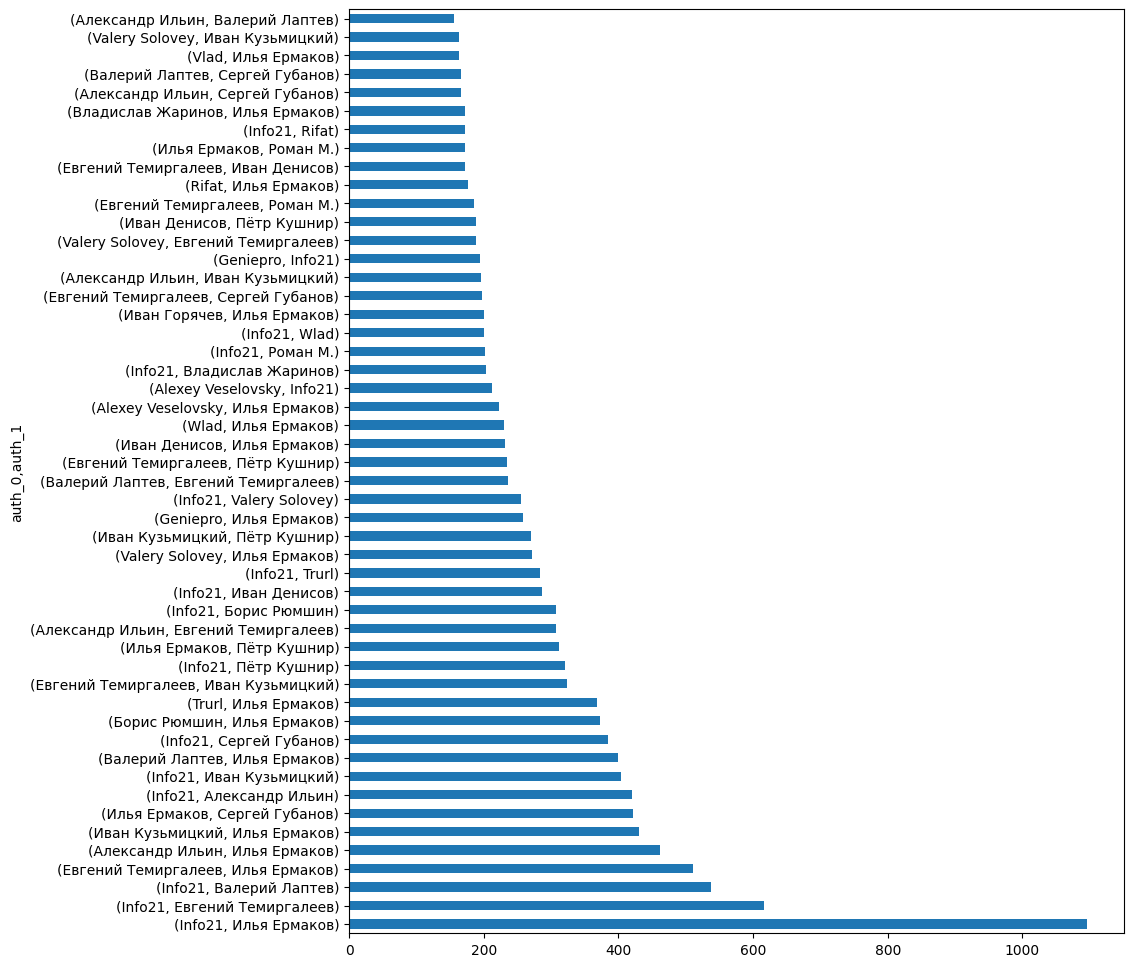

In [14]:
(auths.value_counts(["auth_0","auth_1"])).nlargest(50).plot(kind='barh', figsize=(10, 12))

In [15]:
for_graph = auths.value_counts(["auth_0","auth_1"]).nlargest(50).reset_index()
for_graph

,auth_0,auth_1,count
0,Info21,Илья Ермаков,1096
1,Info21,Евгений Темиргалеев,616
2,Info21,Валерий Лаптев,538
3,Евгений Темиргалеев,Илья Ермаков,510
4,Александр Ильин,Илья Ермаков,462
5,Иван Кузьмицкий,Илья Ермаков,430
6,Илья Ермаков,Сергей Губанов,422
7,Info21,Александр Ильин,420
8,Info21,Иван Кузьмицкий,404
9,Валерий Лаптев,Илья Ермаков,400


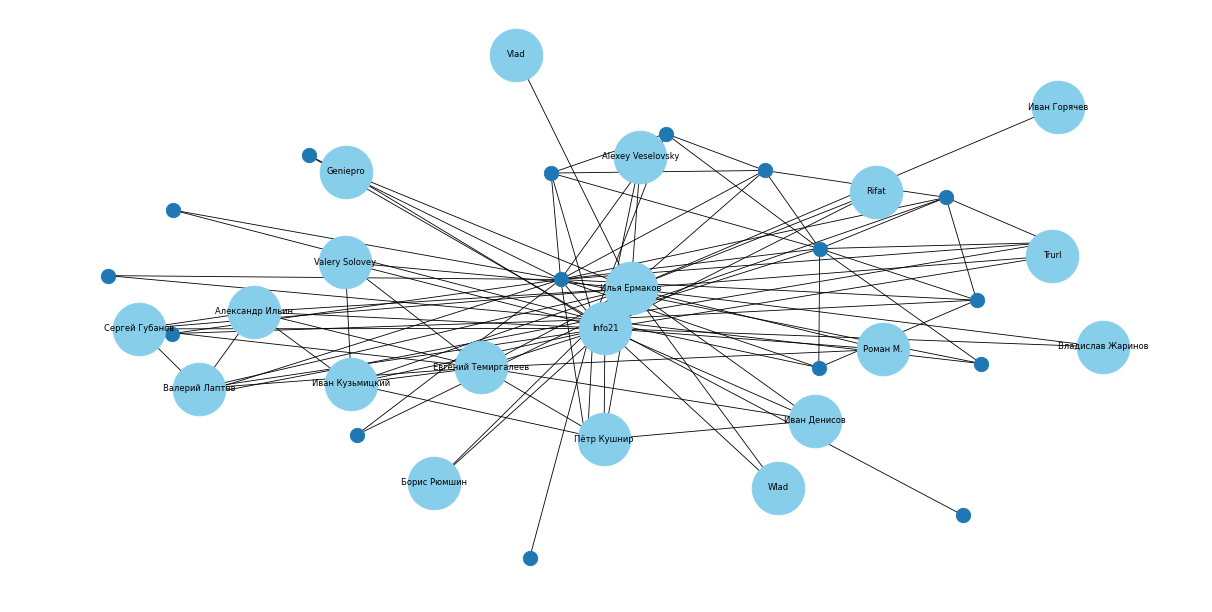

In [16]:
import networkx as nx 
import matplotlib.pyplot as plt
fig = plt.figure(1, figsize=(20, 10), dpi=60)

G=nx.from_pandas_edgelist(for_graph, 'auth_0', 'auth_1')
pos = nx.draw_spring(G)  # Определяем расположение узлов


nx.draw(G, pos, with_labels=True, node_size=4000, node_color='skyblue', font_size=10)
#labels = nx.get_edge_attributes(G, 'weight')
#nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)